In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

%cd /content/gdrive/MyDrive/pytest_img/opencv/

In [ ]:
%pwd

In [ ]:
import numpy as np
def Conv2D(img,kernel=None,stride=1):
  h,w=img.shape
  kh,kw=kernel.shape

  output_height = ((h - kh)//stride) + 1
  output_width = ((w - kw)//stride) + 1
  img_out = np.zeros((output_height,output_width),dtype=np.uint8)

  for y in range(output_height):
    for x in range(output_width):
      roi = img[y*stride:y*stride+kh,x*stride:x*stride+kw]
      filtered = roi * kernel
      conv_value = np.abs(np.sum(filtered))
      img_out[y,x] = np.uint8(conv_value)

  return img_out

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread("mountain.jpg",cv2.IMREAD_GRAYSCALE) # 엣지를 더 잘 찾아내기 위함
kernel = np.array([[0,0,0],[-1,2,-1],[0,0,0]])
output=Conv2D(img,kernel=kernel)
output_1=Conv2D(img,kernel=kernel,stride=2)
cv2_imshow(img)
cv2_imshow(output)
cv2_imshow(output_1)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
print(img.shape)
print(output_1.shape)

In [ ]:
import numpy as np
def conv2d_with_padding(img, kernel, stride=1, padding=1):
  h, w = img.shape # 이미지의 높이와 너비
  kh, kw = kernel.shape # 커널(필터)의 높이와 너비
  padded_h = h + 2 * padding # 패딩이 적용된 이미지의 높이 계산
  padded_w = w + 2 * padding # 패딩이 적용된 이미지의 너비 계산
  padded_img = np.zeros((padded_h, padded_w)) # 패딩된 크기로 결과 이미지를 초기화
  padded_img[padding:h + padding, padding:w + padding] = img # 패딩 위치를 제외하고 이미지를 삽입
  output_height = ((padded_h - kh) // stride) + 1 # stride가 적용된 결과 이미지 높이 계산
  output_width = ((padded_w - kw) // stride) + 1 # stride가 적용된 결과 이미지 너비 계산
  img_out = np.zeros((output_height, output_width), dtype=np.uint8) # stride가 적용된 결과 이미지 초기화
  # 합성곱 연산 수행
  for y in range(output_height):
    for x in range(output_width):
      roi = padded_img[y*stride:y*stride+kh, x*stride:x*stride+kw] # 관심 영역 추출
      filtered = roi * kernel # 필터링
      conv_value = np.abs(np.sum(filtered)) # 절대값 적용 후 합산
      img_out[y, x] = np.uint8(conv_value) # 결과 저장
  return img_out, padded_img # 패딩 결과 확인 위해 padded_img 출력

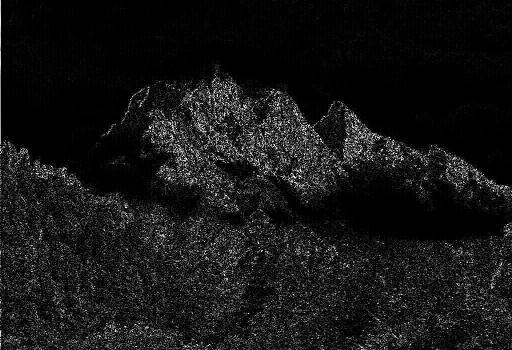

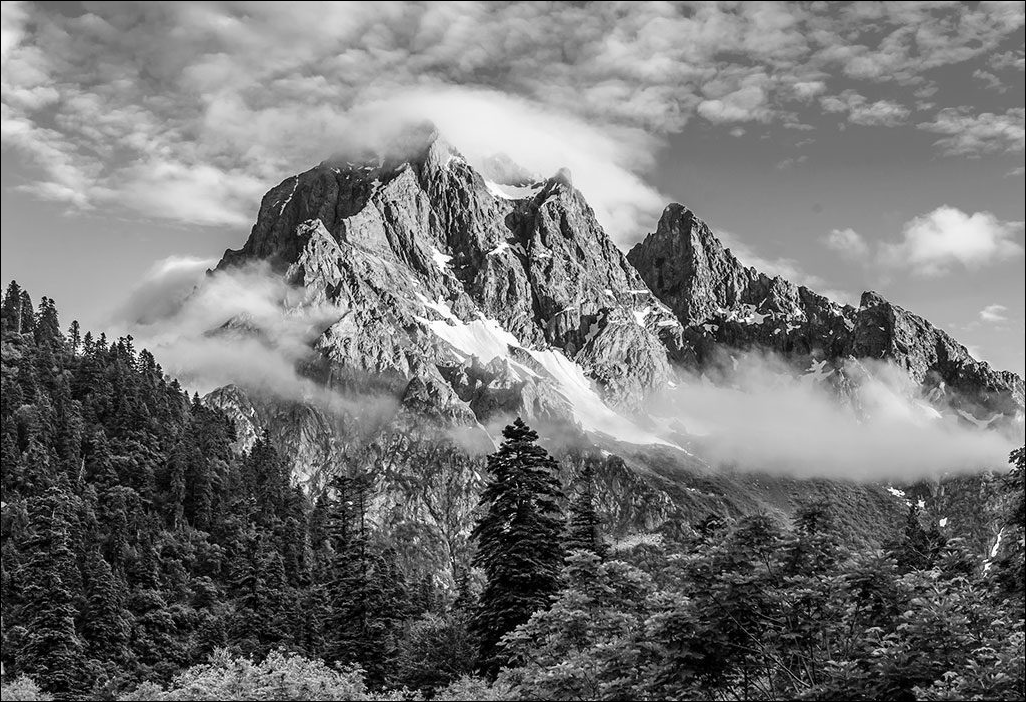

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread("mountain.jpg",cv2.IMREAD_GRAYSCALE) # 엣지를 더 잘 찾아내기 위함
kernel = np.array([[0,0,0],[-1,2,-1],[0,0,0]])
output_1,output_2=conv2d_with_padding(img,kernel=kernel,stride=2,padding=1)
cv2_imshow(output_1)
cv2_imshow(output_2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
print(output_1.shape)
print(output_2.shape)

(350, 512)
(702, 1026)


In [ ]:
print("패딩 이미지:\n",output_2)

패딩 이미지:
 [[  0.   0.   0. ...   0.   0.   0.]
 [  0. 196. 194. ... 166. 166.   0.]
 [  0. 201. 199. ... 153. 151.   0.]
 ...
 [  0.  88. 135. ...  37.  36.   0.]
 [  0. 150. 119. ...  33.  19.   0.]
 [  0.   0.   0. ...   0.   0.   0.]]
